In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '/Users/shakthimaha/development/Urban/data/processed/cleaned_buildingEEandER.parquet'
df = pd.read_parquet(file_path)

In [ ]:
print("First few rows of the dataset:")
print(df.head())

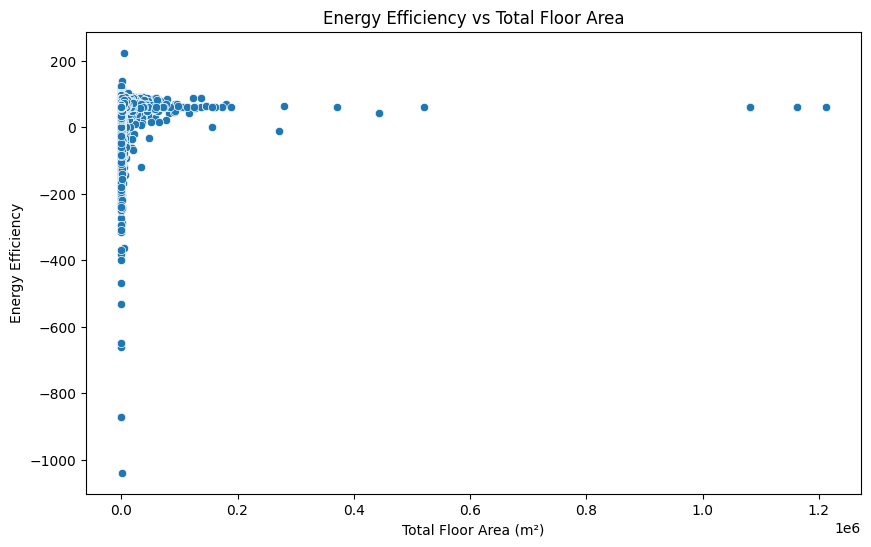

In [5]:
# Example 1: Scatter plot between TotalFloorArea and EnergyEfficiency
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TotalFloorArea', y='EnergyEfficiency')
plt.title('Energy Efficiency vs Total Floor Area')
plt.xlabel('Total Floor Area (m²)')
plt.ylabel('Energy Efficiency')
plt.show()

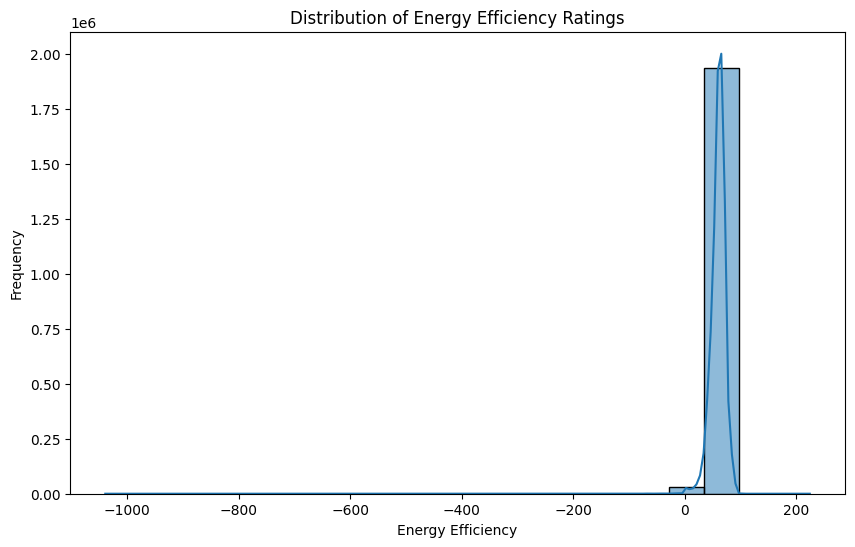

In [6]:
# Example 2: Distribution of Energy Efficiency ratings
plt.figure(figsize=(10,6))
sns.histplot(df['EnergyEfficiency'], kde=True, bins=20)
plt.title('Distribution of Energy Efficiency Ratings')
plt.xlabel('Energy Efficiency')
plt.ylabel('Frequency')
plt.show()

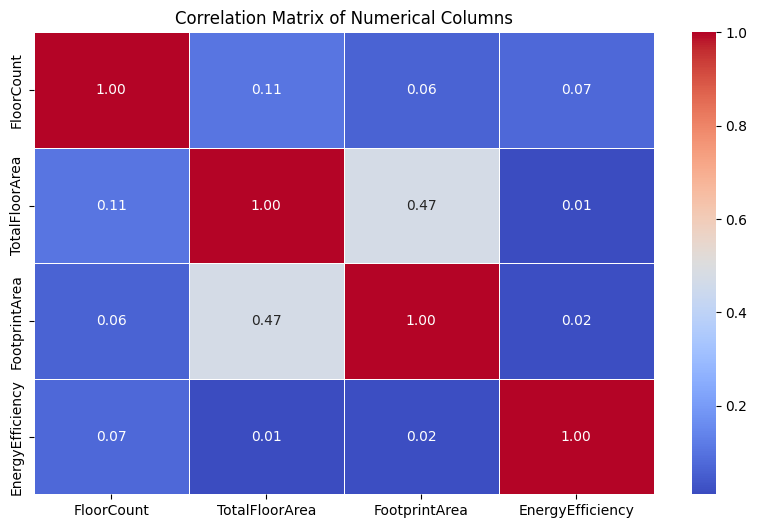

In [7]:
plt.figure(figsize=(10,6))
correlation_matrix = df[['FloorCount', 'TotalFloorArea', 'FootprintArea', 'EnergyEfficiency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

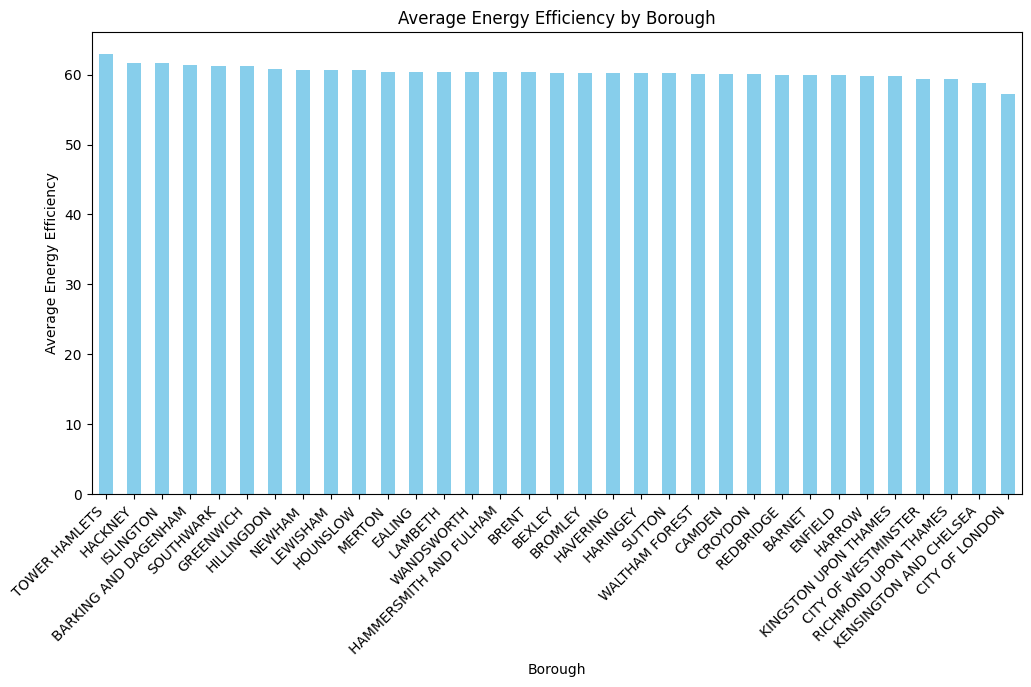

In [8]:
# Example 4: Energy Efficiency by Borough
plt.figure(figsize=(12,6))
borough_energy_efficiency = df.groupby('Borough')['EnergyEfficiency'].mean().sort_values(ascending=False)
borough_energy_efficiency.plot(kind='bar', color='skyblue')
plt.title('Average Energy Efficiency by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Energy Efficiency')
plt.xticks(rotation=45, ha='right')
plt.show()

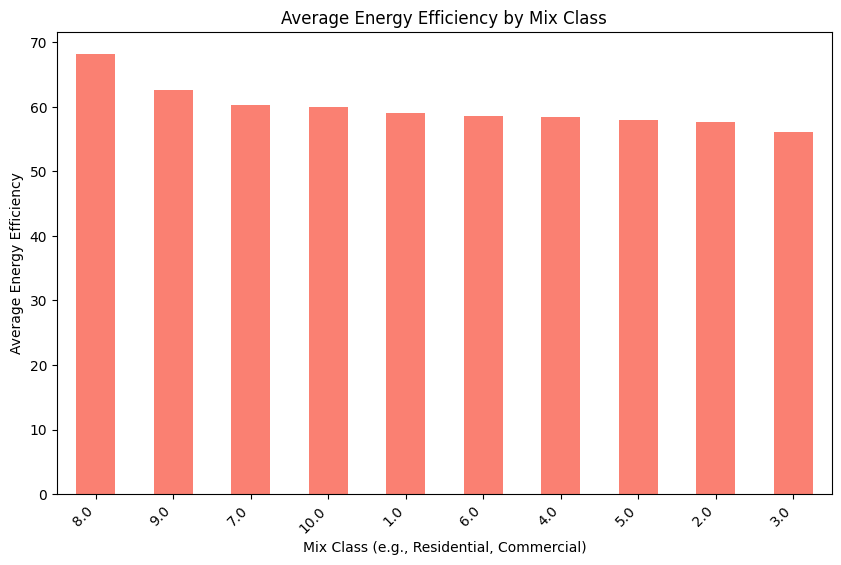

In [9]:
# Example 5: Energy Efficiency by Mix Class (e.g., Residential, Commercial)
plt.figure(figsize=(10,6))
mix_class_energy_efficiency = df.groupby('MixClass')['EnergyEfficiency'].mean().sort_values(ascending=False)
mix_class_energy_efficiency.plot(kind='bar', color='salmon')
plt.title('Average Energy Efficiency by Mix Class')
plt.xlabel('Mix Class (e.g., Residential, Commercial)')
plt.ylabel('Average Energy Efficiency')
plt.xticks(rotation=45, ha='right')
plt.show()

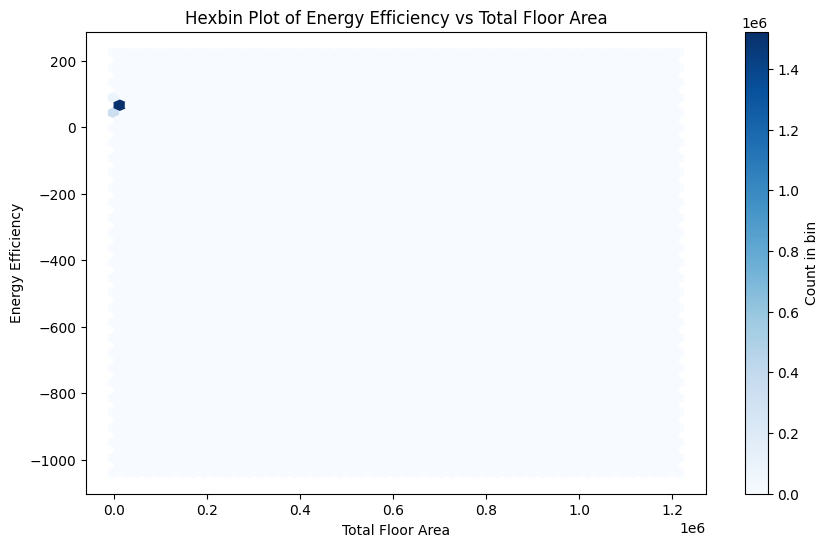

In [22]:
plt.figure(figsize=(10,6))
plt.hexbin(df['TotalFloorArea'], df['EnergyEfficiency'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count in bin')
plt.title('Hexbin Plot of Energy Efficiency vs Total Floor Area')
plt.xlabel('Total Floor Area')
plt.ylabel('Energy Efficiency')
plt.show()

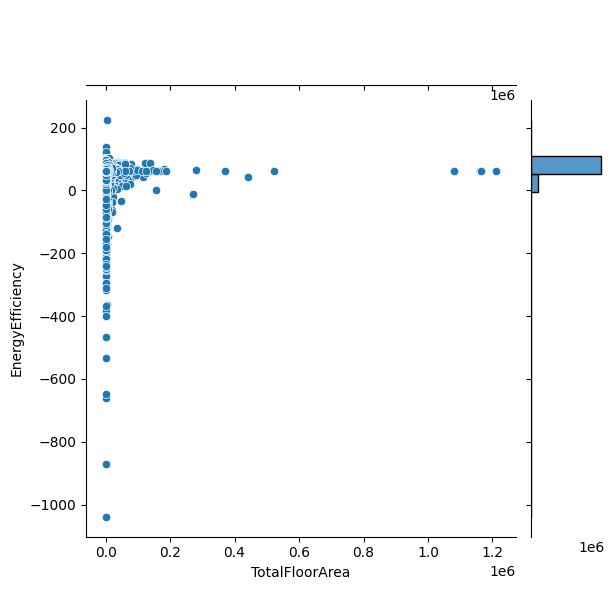

In [23]:
sns.jointplot(data=df, x='TotalFloorArea', y='EnergyEfficiency', kind='scatter')
plt.show()

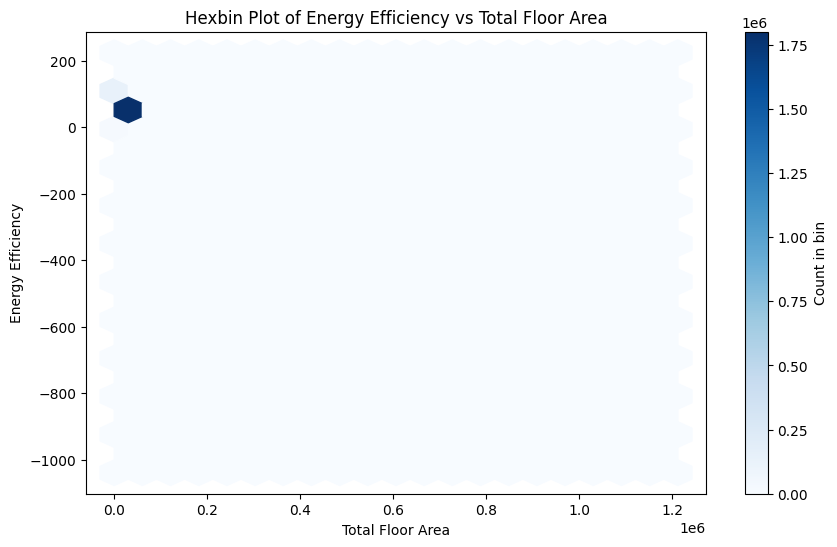

In [24]:
plt.figure(figsize=(10,6))
plt.hexbin(df['TotalFloorArea'], df['EnergyEfficiency'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count in bin')
plt.title('Hexbin Plot of Energy Efficiency vs Total Floor Area')
plt.xlabel('Total Floor Area')
plt.ylabel('Energy Efficiency')
plt.show()

In [25]:
print(df[['TotalFloorArea', 'EnergyEfficiency']].describe())

       TotalFloorArea  EnergyEfficiency
count    1.963647e+06      1.963647e+06
mean     2.147115e+02      6.035334e+01
std      3.496904e+03      9.046637e+00
min      0.000000e+00     -1.039000e+03
25%      8.700000e+01      6.100000e+01
50%      1.090000e+02      6.100000e+01
75%      1.500000e+02      6.100000e+01
max      1.211826e+06      2.240000e+02


In [26]:
df = df[df['TotalFloorArea'] > 0]
df = df[df['EnergyEfficiency'] > 0]  # Assuming energy efficiency can't be negative


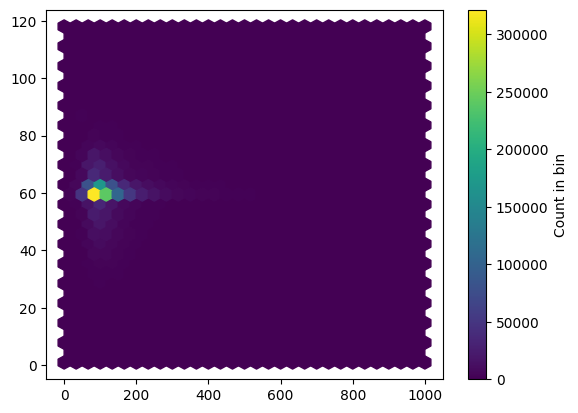

In [27]:
df_filtered = df[(df['TotalFloorArea'] < 1000) & (df['EnergyEfficiency'] < 120)]
plt.hexbin(df_filtered['TotalFloorArea'], df_filtered['EnergyEfficiency'], gridsize=30, cmap='viridis')
plt.colorbar(label='Count in bin')

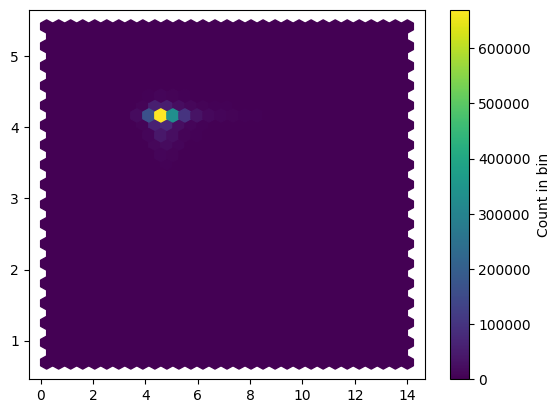

In [29]:
import numpy as np
df['TotalFloorArea_log'] = np.log(df['TotalFloorArea'] + 1)  # Adding 1 to avoid log(0)
df['EnergyEfficiency_log'] = np.log(df['EnergyEfficiency'] + 1)
plt.hexbin(df['TotalFloorArea_log'], df['EnergyEfficiency_log'], gridsize=30, cmap='viridis')
plt.colorbar(label='Count in bin')